In [1]:
from __future__ import division
from __future__ import print_function
from sklearn.ensemble import IsolationForest

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from numpy import percentile
from sklearn.metrics import average_precision_score
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# Define the number of inliers and outliers
n_samples = 256
outliers_fraction = 0.25
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

In [6]:
random_state = np.random.RandomState(42)
# Define nine outlier detection tools to be compared
classifiers = {
    'Isolation Forest': IsolationForest(n_estimators= 100, 
                                random_state=random_state, max_samples=256, bootstrap = False)
}

{'whiskers': [<matplotlib.lines.Line2D at 0x1aba2d81280>,
 'caps': [<matplotlib.lines.Line2D at 0x1aba2d815e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aba2ee2d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1aba2d81b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aba2d81e50>],
 'means': []}

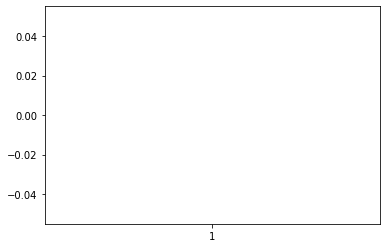

In [7]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\breastw.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)
    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    
    A = np.array([
[    496, 358, 1001, 882, 1595, 763],
[    613, 608, 1878, 619, 142, 730],
[    1067, 136, 1276, 1104, 1165, 1291],
[    786, 446, 437, 74, 900, 235],
[    597, 289, 1155, 291, 1319, 342],
[    1097, 1603, 387, 1872, 1432, 423],
[    957, 778, 1816, 603, 1646, 426],
[    1707, 1409, 441, 1668, 58, 590],
[    870, 751, 1334, 787, 1961, 639],
[    1828, 1666, 957, 1422, 748, 836],
[    700, 1024, 1845, 662, 898, 988],
[    1787, 913, 1225, 1422, 1733, 1618],
[    1305, 1628, 683, 38, 1747, 163],
[    271, 614, 1147, 904, 764, 1046],
[    1063, 664, 1139, 1227, 1317, 416],
[    1647, 1859, 651, 1486, 52, 1318],
[    62, 1610, 1760, 1027, 200, 1607],
[    1073, 1321, 449, 481, 303, 372],
[    282, 608, 1842, 756, 690, 1321],
[    310, 1625, 524, 1765, 342, 538],
[    6, 845, 407, 1496, 1261, 90],
[    1336, 877, 153, 484, 1267, 1499],
[    1946, 1896, 1167, 70, 1759, 267],
[    885, 358, 589, 280, 1941, 1513],
[    263, 544, 1862, 855, 1659, 942],
[    1795, 1832, 641, 1339, 1729, 990],
[    1878, 1684, 1751, 1303, 201, 819],
[    1647, 1302, 1479, 955, 1399, 331],
[    1980, 1000, 663, 864, 1530, 1631],
[    1720, 1060, 1721, 858, 319, 1040],
[    623, 78, 1581, 746, 1816, 1133],
[    1000, 568, 200, 391, 1410, 1850],
[    1275, 864, 1007, 860, 1377, 1598],
[    281, 402, 124, 1228, 1447, 557],
[    650, 742, 404, 869, 1418, 1018],
[    109, 911, 1878, 1997, 1720, 1383],
[    865, 534, 1086, 324, 1998, 1920],
[    188, 1379, 482, 397, 1842, 1034],
[    544, 1022, 588, 306, 1613, 1701],
[    1195, 470, 1869, 719, 536, 893],
[    79, 419, 1137, 1197, 1764, 1503],
[    1272, 1627, 1469, 1660, 70, 736],
[    1135, 742, 1695, 1080, 228, 643],
[    1337, 909, 178, 784, 422, 585],
[    1637, 1298, 1885, 1879, 1708, 1462],
[    311, 1650, 104, 1600, 447, 1005],
[    236, 49, 1172, 1159, 1306, 92],
[    1190, 127, 1483, 1823, 1806, 1118],
[    1179, 203, 1412, 329, 1448, 997],
[    756, 1197, 1530, 1015, 280, 149],
[    246, 1186, 1253, 1273, 399, 301],
[    24, 976, 1698, 730, 1031, 257],
[    1992, 203, 52, 1777, 330, 73],
[    1279, 1627, 1525, 1389, 1758, 887],
[    1675, 1070, 1816, 1792, 710, 1486],
[    541, 89, 1128, 1779, 1897, 1407],
[    1155, 1933, 658, 1023, 262, 1999],
[    1736, 1870, 905, 235, 1471, 1588],
[    169, 1895, 437, 1551, 668, 585],
[    828, 218, 713, 1008, 449, 435],
[    671, 1966, 449, 1457, 599, 368],
[    1961, 1461, 154, 1590, 112, 1407],
[    253, 500, 1105, 1674, 581, 418],
[    422, 1952, 1805, 1686, 1639, 443],
[    448, 347, 55, 784, 1103, 1914],
[    1511, 1887, 1050, 125, 1376, 1446],
[    720, 421, 620, 1996, 586, 1754],
[    1990, 1366, 480, 600, 594, 1841],
[    697, 987, 981, 1888, 948, 1689],
[    300, 1807, 1236, 976, 481, 1112],
[    34, 422, 1178, 1558, 1463, 3],
[    1758, 864, 770, 1433, 1368, 1182],
[    1373, 1441, 962, 629, 1431, 1257],
[    1913, 1382, 1755, 206, 1424, 1182],
[    1871, 1585, 515, 149, 820, 1325],
[    1414, 835, 169, 1404, 985, 1828],
[    1285, 837, 568, 1703, 1718, 186],
[    909, 1560, 1945, 6, 807, 1747],
[    819, 1606, 851, 1734, 1655, 652],
[    1577, 729, 532, 1435, 1238, 1106],
[    872, 1933, 1079, 750, 1317, 373],
[    1986, 180, 85, 306, 633, 1055],
[    703, 155, 883, 1018, 288, 556],
[    176, 277, 1995, 1397, 787, 1038],
[    379, 1797, 1907, 62, 498, 834],
[    838, 1396, 511, 1712, 973, 1134],
[    906, 1578, 1544, 1835, 482, 43],
[    758, 932, 917, 294, 1729, 1738],
[    1619, 1844, 1990, 1154, 367, 634],
[    648, 377, 92, 465, 1519, 665],
[    46, 1206, 1650, 1848, 554, 76],
[    318, 811, 1124, 1798, 1169, 512],
[    1242, 1688, 37, 894, 1103, 862],
[    1598, 834, 783, 636, 1667, 1081],
[    270, 981, 1017, 273, 1098, 1916],
[    946, 1343, 254, 1103, 1125, 895],
[    1614, 886, 1727, 155, 1351, 30],
[    525, 1285, 219, 39, 1219, 1255],
[    1487, 536, 1110, 1770, 254, 474],
[    1956, 280, 1856, 584, 336, 1833],
[    1778, 516, 1494, 1817, 1662, 408],
[    1799, 469, 1506, 1194, 293, 14],
[    1377, 360, 94, 644, 521, 996],
[    695, 1649, 957, 787, 581, 1841],
[    1003, 1996, 1757, 460, 851, 1370],
[    541, 1254, 1084, 867, 64, 1387],
[    1084, 507, 1970, 627, 721, 587],
[    541, 381, 604, 211, 16, 1562],
[    772, 1462, 870, 1504, 446, 1302],
[    1227, 1048, 1348, 1916, 1647, 590],
[    1548, 222, 1394, 1684, 572, 161],
[    1487, 923, 1647, 1376, 619, 1368],
[    1714, 1222, 565, 89, 1948, 447],
[    1756, 1192, 937, 598, 1968, 959],
[    1194, 1964, 1538, 1489, 834, 155],
[    1246, 290, 314, 445, 932, 59],
[    1979, 1420, 1095, 1083, 1725, 1673],
[    90, 1347, 697, 1765, 109, 455],
[    328, 1047, 146, 1873, 1493, 55],
[    1747, 1057, 1009, 1250, 1759, 278],
[    1645, 1741, 1459, 1821, 1959, 134],
[    1709, 353, 1493, 1163, 147, 484],
[    1234, 1993, 580, 1640, 1163, 172],
[    1218, 266, 213, 546, 626, 843],
[    369, 867, 390, 587, 346, 81],
[    1293, 882, 360, 966, 1244, 1237],
[    826, 770, 744, 575, 837, 1879],
[    1168, 883, 431, 936, 428, 1942],
[    1803, 768, 365, 435, 500, 1819],
[    529, 814, 1010, 1829, 752, 1964],
[    940, 1828, 864, 736, 1334, 1140],
[    1984, 1842, 160, 25, 978, 1059],
[    521, 39, 1140, 1016, 323, 956],
[    1853, 1188, 1566, 1264, 296, 10],
[    852, 1341, 1960, 410, 1332, 1476],
[    577, 1611, 1204, 1630, 1518, 1531],
[    194, 691, 1439, 675, 817, 1555],
[    506, 182, 1783, 634, 1241, 1592],
[    1388, 1890, 965, 151, 1910, 213],
[    862, 773, 1109, 728, 1992, 1213],
[    1900, 1627, 574, 844, 1676, 1335],
[    554, 827, 420, 34, 873, 1787],
[    134, 597, 1552, 430, 462, 1217],
[    270, 1283, 473, 862, 239, 22],
[    1063, 518, 160, 1864, 315, 1954],
[    1451, 570, 226, 1182, 396, 1079],
[    722, 723, 1508, 774, 1300, 893],
[    1086, 132, 237, 188, 1374, 291],
[    153, 908, 336, 1308, 410, 1671],
[    1330, 1923, 1933, 115, 1057, 999],
[    812, 1318, 86, 1303, 1705, 1255],
[    742, 1584, 464, 847, 1434, 156],
[    1480, 248, 679, 234, 1776, 700],
[    1419, 315, 807, 32, 134, 969],
[    531, 1840, 410, 1899, 1113, 263],
[    968, 1208, 1577, 1222, 927, 232],
[    1670, 90, 369, 1844, 1799, 1372],
[    6, 31, 1722, 1344, 1220, 296],
[    953, 1218, 514, 782, 1373, 318],
[    473, 1131, 1955, 655, 1004, 922],
[    108, 1483, 529, 800, 1879, 928],
[    6, 1480, 1243, 1616, 196, 568],
[    1833, 1567, 949, 1519, 1404, 1094],
[    1763, 1495, 1828, 209, 263, 204],
[    810, 1324, 1924, 1569, 1958, 1549],
[    692, 1435, 714, 1406, 1438, 1212],
[    1356, 152, 1089, 510, 1998, 271],
[    267, 48, 285, 869, 1539, 362],
[    1825, 1175, 1217, 888, 1144, 739],
[    1464, 371, 573, 1482, 888, 1850],
[    1293, 851, 305, 247, 1576, 1543],
[    1658, 1785, 48, 1379, 1936, 156],
[    1023, 1462, 1681, 288, 1824, 488],
[    1298, 602, 87, 683, 1872, 328],
[    1873, 432, 11, 349, 1263, 1734],
[    769, 1544, 99, 25, 59, 288],
[    176, 904, 403, 1864, 1175, 123],
[    1298, 207, 1813, 652, 311, 120],
[    577, 400, 378, 269, 1711, 287],
[    1795, 832, 294, 372, 197, 190],
[    1590, 736, 520, 301, 1862, 650],
[    1365, 968, 1118, 1388, 402, 573],
[    1665, 402, 1060, 1940, 1044, 868],
[    162, 464, 256, 90, 1263, 1370],
[    1678, 836, 1737, 1751, 1747, 203],
[    540, 1536, 594, 1118, 1417, 926],
[    830, 414, 790, 1196, 344, 207],
[    1618, 521, 338, 706, 116, 1304],
[    927, 1625, 649, 798, 870, 1471],
[    1912, 821, 233, 1222, 967, 610],
[    575, 373, 1483, 268, 1491, 392],
[    933, 727, 890, 413, 949, 1351],
[    1564, 1119, 1229, 1707, 1131, 699],
[    805, 363, 14, 1183, 1772, 1371],
[    1758, 449, 361, 1934, 666, 345],
[    723, 1800, 48, 1759, 800, 1384],
[    1462, 1682, 132, 599, 1105, 1696],
[    1456, 506, 649, 1498, 408, 891],
[    1301, 1992, 872, 502, 30, 565],
[    82, 500, 1205, 1554, 339, 1980],
[    603, 519, 1727, 85, 923, 1980],
[    687, 1014, 913, 1427, 1759, 1482],
[    221, 1126, 366, 863, 495, 634],
[    443, 408, 1696, 365, 172, 398],
[    1151, 26, 1297, 193, 1323, 419],
[    1298, 1290, 393, 223, 1106, 1967],
[    1211, 1342, 699, 1944, 937, 1046],
[    473, 965, 977, 1840, 1243, 1017],
[    344, 620, 1687, 1186, 1276, 1960],
[    190, 606, 1299, 148, 633, 724],
[    1227, 1081, 1385, 1184, 1968, 932],
[    994, 95, 833, 861, 766, 1239],
[    1862, 1219, 766, 1942, 909, 212],
[    41, 392, 1283, 1397, 1005, 356],
[    244, 1813, 1304, 1570, 350, 1047],
[    1190, 1913, 1919, 936, 1220, 10],
[    657, 1661, 409, 1205, 119, 93],
[    585, 1495, 1627, 1082, 1255, 1852],
[    1150, 675, 1086, 1841, 1697, 1982],
[    350, 456, 467, 1551, 899, 1194],
[    1179, 497, 1861, 924, 881, 131],
[    1791, 1830, 629, 896, 102, 549],
[    1979, 1074, 26, 623, 99, 1171],
[    1940, 132, 501, 925, 293, 1936],
[    1698, 962, 208, 1874, 753, 1374],
[    1370, 1070, 397, 1551, 634, 1615],
[    1181, 1415, 1692, 445, 1170, 984],
[    1588, 575, 764, 1753, 1715, 334],
[    834, 1145, 708, 1605, 1164, 851],
[    612, 863, 1862, 64, 1180, 1434],
[    780, 408, 229, 1511, 616, 39],
[    361, 397, 704, 1708, 587, 1422],
[    560, 574, 317, 820, 1958, 1580],
[    1805, 1638, 1497, 1145, 1744, 613],
[    373, 491, 1817, 345, 396, 284],
[    1073, 1286, 733, 872, 1662, 1668],
[    307, 412, 1304, 1563, 1454, 873],
[    545, 179, 444, 1790, 1467, 1643],
[    979, 1249, 1819, 1451, 338, 1467],
[    415, 1719, 32, 1557, 1351, 618],
[    1924, 1837, 452, 2, 682, 1783],
[    2000, 1026, 1862, 34, 892, 1470],
[    837, 1471, 1725, 219, 792, 1592],
[    1278, 1886, 978, 1372, 1686, 1334],
[    840, 1088, 1173, 1355, 908, 1792],
[    1947, 85, 627, 836, 1027, 1670],
[    895, 1007, 274, 500, 1372, 1385],
[    1099, 458, 1986, 1118, 457, 554],
[    1576, 744, 1784, 1417, 743, 1934],
[    451, 1302, 564, 142, 543, 1680],
[    1925, 1108, 572, 321, 331, 646],
[    1701, 775, 885, 674, 161, 1552],
[    155, 696, 1093, 747, 221, 1373],
[    1189, 1625, 6, 850, 782, 1507],
[    899, 625, 551, 1773, 1118, 457],
[    1820, 575, 1224, 996, 33, 404],
[    997, 362, 778, 637, 898, 963],
[    1854, 1487, 1992, 421, 338, 1472],
[    1023, 85, 236, 1088, 1964, 781],
[    1286, 1895, 447, 146, 1450, 1554],
[    679, 1507, 507, 938, 1348, 70],
[    82, 1241, 1521, 438, 1524, 1195],
[    1816, 1197, 1956, 267, 1258, 1738],
[    1227, 1465, 1544, 1671, 979, 1000],
[    179, 1200, 34, 1779, 1873, 1461],
[    1881, 1999, 104, 16, 1354, 402],
[    833, 1174, 575, 683, 931, 646],
[    1392, 264, 1256, 871, 136, 255],
[    1339, 1189, 1550, 207, 1529, 1288],
[    1650, 1598, 503, 1839, 579, 29],
[    796, 1561, 1903, 1101, 1052, 1585],
[    206, 1935, 1119, 862, 305, 590],
[    1727, 1829, 1986, 78, 207, 36],
[    29, 506, 172, 1207, 1531, 300],
[    1732, 899, 986, 667, 73, 1981],
[    776, 1735, 972, 431, 10, 1229],
[    1247, 1740, 1089, 1291, 9, 113],
[    1446, 89, 1714, 413, 1843, 761],
[    1855, 811, 897, 1240, 274, 1676],
[    1989, 1210, 1001, 1772, 1131, 1575],
[    412, 1329, 604, 854, 776, 1388],
[    1156, 754, 1998, 144, 579, 215],
[    1350, 1837, 23, 53, 622, 359],
[    1856, 1414, 806, 45, 1686, 688],
[    12, 1076, 1229, 77, 854, 648],
[    485, 1012, 1897, 121, 1605, 1274],
[    1946, 1921, 495, 630, 1762, 277],
[    176, 1378, 7, 964, 39, 941],
[    654, 1085, 1125, 172, 992, 12],
[    1966, 731, 1356, 333, 1294, 1259],
[    1487, 1127, 1019, 1513, 1372, 241],
[    4, 527, 451, 134, 1543, 811],
[    1675, 1679, 1820, 1277, 1485, 660],
[    114, 891, 230, 210, 1245, 841],
[    1178, 1202, 402, 1471, 1824, 1429],
[    1663, 323, 1083, 1569, 1192, 599],
[    1990, 856, 156, 808, 956, 974],
[    1801, 772, 599, 546, 296, 1965],
[    885, 914, 484, 1200, 793, 494],
[    1610, 302, 1144, 960, 752, 1319],
[    1018, 265, 669, 1399, 765, 316],
[    1409, 1609, 881, 666, 193, 557],
[    287, 1447, 1034, 1626, 1788, 899],
[    565, 486, 1691, 94, 1959, 968],
[    464, 951, 212, 1876, 1579, 144],
[    1835, 1023, 239, 386, 164, 1301],
[    179, 1087, 790, 584, 1568, 45],
[    1261, 1579, 885, 861, 447, 1513],
[    47, 295, 624, 1109, 1436, 341],
[    769, 1083, 874, 342, 317, 1685],
[    1716, 630, 1381, 1551, 53, 1604],
[    682, 1042, 426, 141, 780, 1759],
[    1807, 1256, 1802, 1787, 1655, 853],
[    1161, 333, 1006, 560, 1201, 36],
[    244, 514, 1144, 1276, 1430, 825],
[    1950, 1524, 698, 604, 1668, 1615],
[    1154, 803, 1841, 1710, 1572, 79],
[    604, 1366, 224, 160, 1594, 502],
[    882, 492, 66, 1081, 1021, 1910],
[    1364, 332, 796, 1953, 1740, 1539],
[    167, 322, 124, 113, 282, 967],
[    1895, 484, 1093, 315, 350, 1601],
[    1589, 675, 975, 1432, 1628, 1662],
[    581, 480, 404, 1320, 1234, 1775],
[    157, 594, 1278, 859, 423, 654],
[    752, 1769, 1463, 863, 818, 1906],
[    977, 1939, 1866, 306, 1980, 168],
[    10, 696, 440, 837, 1884, 629],
[    1571, 226, 1903, 782, 1613, 1015],
[    1090, 599, 175, 443, 1068, 1884],
[    1864, 316, 261, 1179, 1678, 163],
[    1559, 1042, 893, 1224, 1664, 1792],
[    568, 1055, 1350, 391, 1575, 390],
[    845, 1341, 983, 43, 337, 707],
[    1463, 1256, 1510, 1968, 47, 735],
[    351, 221, 698, 1476, 1039, 124],
[    440, 1142, 165, 436, 1981, 533],
[    1784, 1561, 1567, 1779, 596, 255],
[    396, 1222, 955, 1606, 341, 1906],
[    1858, 1074, 1259, 1809, 1299, 121],
[    445, 474, 312, 1867, 1948, 1719],
[    613, 264, 1132, 557, 1553, 750],
[    1778, 1421, 1546, 944, 59, 1568],
[    1683, 112, 841, 1796, 1648, 299],
[    1700, 1739, 75, 1256, 1301, 61],
[    1267, 208, 1558, 953, 1705, 686],
[    637, 550, 416, 1832, 52, 649],
[    1131, 1400, 911, 880, 298, 1660],
[    353, 1108, 1039, 1183, 733, 1076],
[    537, 1211, 678, 1369, 426, 54],
[    302, 579, 1034, 738, 946, 816],
[    1105, 1036, 445, 989, 619, 468],
[    840, 1723, 1336, 1479, 436, 928],
[    1740, 1910, 1823, 481, 1937, 1645],
[    1634, 626, 249, 1162, 760, 1150],
[    1666, 817, 309, 1288, 381, 1101],
[    1991, 1907, 1798, 636, 1118, 500],
[    340, 1705, 51, 661, 1596, 1270],
[    1613, 939, 1821, 683, 709, 405],
[    90, 854, 359, 817, 352, 1168],
[    695, 985, 1742, 608, 1431, 1793],
[    1020, 1563, 1446, 1750, 9, 261],
[    1229, 1857, 165, 292, 1250, 519],
[    1237, 393, 1451, 784, 227, 1941],
[    601, 1857, 935, 1167, 280, 1003],
[    213, 1428, 1918, 1211, 1136, 1449],
[    1636, 1973, 517, 1631, 1353, 790],
[    1369, 1608, 1294, 126, 857, 336],
[    1601, 1096, 751, 1994, 1378, 1012],
[    1796, 216, 393, 781, 1595, 1099],
[    1073, 73, 1024, 1836, 813, 909],
[    192, 1432, 1279, 1334, 864, 1523],
[    639, 1334, 1567, 256, 1466, 826],
[    1786, 473, 1972, 259, 1975, 956],
[    1733, 304, 1789, 1310, 1124, 857],
[    258, 2, 1950, 765, 257, 261],
[    1813, 1887, 1003, 550, 1093, 453],
[    1183, 1958, 115, 1685, 1782, 1000],
[    993, 519, 1868, 731, 1399, 571],
[    127, 1339, 564, 1242, 256, 1879],
[    963, 1467, 778, 1407, 1365, 568],
[    339, 1550, 312, 130, 1921, 1745],
[    506, 320, 1877, 239, 1121, 972],
[    1352, 1280, 652, 1336, 1155, 677],
[    1796, 551, 436, 189, 483, 1099],
[    1430, 1136, 308, 661, 579, 1115],
[    991, 1210, 1154, 1146, 973, 1063],
[    336, 297, 781, 728, 829, 377],
[    1045, 244, 1268, 546, 427, 1427],
[    342, 1177, 1221, 1613, 235, 436],
[    741, 1860, 1360, 1109, 935, 891],
[    983, 1074, 1730, 299, 612, 782],
[    1725, 246, 144, 1337, 1306, 485],
[    154, 308, 644, 146, 1741, 811],
[    1831, 607, 903, 943, 1131, 1916],
[    1550, 919, 1153, 1890, 1388, 698],
[    1991, 1052, 1960, 296, 771, 1919],
[    1040, 1297, 80, 1420, 1032, 1468],
[    848, 373, 136, 1126, 358, 579],
[    43, 1599, 1450, 874, 328, 379],
[    1241, 439, 1441, 1813, 1933, 275],
[    1363, 1585, 1278, 1701, 847, 1819],
[    556, 996, 811, 1117, 1728, 656],
[    1394, 925, 889, 1418, 1989, 735],
[    1363, 1051, 880, 1056, 752, 881],
[    1476, 1309, 85, 1249, 1380, 609],
[    1320, 1144, 1507, 1959, 642, 1671],
[    11, 1367, 92, 1446, 1745, 1714],
[    148, 1885, 1142, 1915, 223, 925],
[    969, 572, 495, 462, 1474, 91],
[    456, 1166, 321, 32, 1456, 1719],
[    873, 1809, 1152, 1799, 1299, 1733],
[    1656, 467, 1424, 688, 335, 1390],
[    1136, 72, 941, 1274, 151, 1168],
[    1777, 1517, 1248, 1715, 1593, 1021],
[    1518, 1904, 1917, 443, 463, 259],
[    1121, 428, 861, 1770, 1115, 890],
[    70, 1471, 263, 1001, 1441, 220],
[    593, 667, 1150, 498, 1327, 730],
[    94, 1651, 1268, 1009, 817, 1630],
[    790, 524, 1226, 1532, 1947, 1586],
[    1558, 1903, 1422, 64, 358, 292],
[    1469, 1620, 1178, 1683, 328, 390],
[    172, 1723, 1693, 472, 1189, 430],
[    288, 225, 1669, 1346, 1660, 1365],
[    869, 1741, 373, 1272, 1101, 933],
[    282, 1177, 6, 1579, 1214, 446],
[    1962, 810, 1383, 1734, 1838, 783],
[    203, 640, 1150, 629, 1509, 1541],
[    1652, 1355, 879, 406, 1393, 1999],
[    847, 445, 1683, 1062, 1988, 513],
[    1368, 1763, 189, 837, 1022, 1244],
[    1174, 682, 1646, 550, 1029, 1775],
[    1947, 852, 725, 589, 338, 516],
[    1799, 941, 167, 885, 528, 737],
[    1914, 1202, 1703, 609, 1775, 1240],
[    1341, 203, 809, 580, 562, 1440],
[    968, 1463, 861, 809, 699, 655],
[    1326, 572, 235, 1232, 408, 92],
[    691, 1722, 53, 1018, 1296, 494],
[    2, 1818, 1384, 1983, 1029, 704],
[    1758, 1029, 1677, 175, 205, 325],
[    946, 1012, 129, 698, 429, 252],
[    1492, 1078, 1330, 1744, 1062, 1829],
[    1986, 1369, 1139, 1319, 1536, 802],
[    1596, 946, 1753, 1708, 206, 1323],
[    1982, 1172, 1176, 394, 616, 282],
[    569, 964, 1795, 57, 1115, 10],
[    1382, 741, 1762, 438, 1203, 212],
[    485, 824, 962, 1905, 1825, 1548],
[    1686, 294, 85, 1882, 966, 1893],
[    939, 540, 449, 543, 870, 23],
[    338, 434, 1103, 1868, 339, 523],
[    767, 260, 63, 113, 275, 926],
[    1995, 973, 953, 1762, 1935, 276],
[    487, 912, 309, 1156, 896, 723],
[    992, 12, 1131, 1200, 1953, 1567],
[    1281, 1122, 1295, 440, 1966, 968],
[    1250, 35, 925, 1103, 1480, 970],
[    1947, 854, 1792, 991, 556, 1585],
[    1960, 910, 662, 645, 1561, 1513],
[    164, 1804, 1140, 1303, 1709, 1462],
[    1243, 864, 512, 1358, 1600, 908],
[    479, 1056, 1182, 1977, 1543, 1609],
[    967, 1692, 1706, 1810, 518, 939],
[    876, 1491, 175, 1493, 1642, 797],
[    1020, 803, 441, 545, 1838, 676],
[    245, 1298, 1410, 1149, 196, 1892],
[    36, 1221, 1767, 1187, 1809, 1533],
[    579, 287, 1401, 1897, 1569, 418],
[    1751, 392, 381, 48, 437, 657],
[    1226, 222, 1191, 211, 989, 1578],
[    6, 28, 1134, 1389, 910, 517],
[    1831, 592, 909, 1168, 1059, 887],
[    165, 1502, 1407, 1950, 1494, 81],
[    528, 1675, 65, 322, 765, 1754],
[    1394, 207, 1683, 1416, 432, 269],
[    120, 911, 509, 640, 1914, 597],
[    1422, 1586, 652, 484, 1858, 331],
[    1330, 1963, 1881, 225, 986, 899],
[    831, 1001, 466, 1032, 120, 1606],
[    94, 1840, 412, 848, 1756, 352],
[    731, 427, 718, 1010, 1020, 1455],
[    268, 638, 1999, 528, 1425, 753],
[    28, 1530, 544, 1630, 216, 1090],
[    531, 340, 1091, 1283, 1650, 1888],
[    1154, 339, 117, 22, 1730, 286],
[    695, 1493, 1462, 1243, 559, 93],
[    1960, 1012, 469, 229, 110, 1089],
[    239, 46, 600, 312, 485, 1289],
[    730, 89, 1417, 1725, 1958, 1216],
[    1318, 655, 1781, 277, 467, 1228],
[    1074, 1118, 1106, 134, 1269, 1792],
[    274, 1818, 502, 1347, 1353, 634],
[    1966, 1204, 719, 317, 1989, 1599],
[    320, 1887, 1380, 962, 1739, 171],
[    43, 81, 788, 673, 417, 1411],
[    288, 1380, 1181, 1928, 1591, 947],
[    1964, 1829, 950, 548, 228, 354],
[    1037, 338, 526, 1895, 990, 631],
[    627, 1387, 269, 19, 1442, 648],
[    1337, 1309, 739, 102, 59, 1887],
[    568, 1795, 1200, 1438, 53, 177],
[    20, 96, 1267, 722, 1999, 697],
[    1053, 1977, 796, 200, 656, 956],
[    1567, 1374, 543, 434, 1664, 1910],
[    1678, 746, 252, 1654, 941, 1718],
[    1036, 1308, 998, 485, 1231, 1107],
[    933, 912, 240, 1046, 1372, 775],
[    1084, 1521, 839, 455, 1696, 30],
[    1796, 247, 1084, 1688, 1463, 941],
[    209, 1496, 282, 1350, 1427, 1017],
[    212, 1852, 35, 320, 543, 660],
[    1657, 660, 321, 407, 406, 1801],
[    1761, 967, 1357, 940, 793, 616],
[    980, 1921, 1782, 1321, 1307, 487],
[    1818, 1082, 76, 125, 729, 88],
[    1962, 512, 415, 1761, 1312, 1397],
[    1461, 488, 1958, 998, 555, 207],
[    1214, 537, 3, 1299, 756, 1791],
[    1352, 369, 540, 1262, 713, 1662],
[    1838, 696, 120, 824, 848, 1199],
[    1016, 1731, 1857, 1393, 328, 263],
[    882, 486, 1461, 210, 574, 1805],
[    3, 966, 422, 617, 880, 1],
[    1574, 1684, 560, 1569, 1535, 709],
[    1359, 1957, 1925, 587, 171, 38],
[    517, 1255, 39, 1195, 1280, 1031],
[    24, 1725, 1189, 358, 396, 1537],
[    120, 112, 1355, 658, 493, 1399],
[    38, 163, 1771, 589, 1896, 134],
[    242, 960, 400, 630, 1742, 1829],
[    1157, 839, 199, 1891, 1270, 800],
[    1532, 1805, 1623, 1636, 1062, 92],
[    1168, 1493, 401, 988, 1233, 1412],
[    498, 167, 730, 1887, 292, 980],
[    1038, 1009, 1650, 1722, 1779, 308],
[    1304, 788, 273, 164, 564, 1798],
[    1, 268, 1192, 1695, 297, 1353],
[    185, 14, 419, 1238, 11, 1867],
[    1942, 1444, 1779, 1267, 965, 1697],
[    773, 858, 256, 209, 1463, 348],
[    1221, 1158, 1582, 1060, 1102, 646],
[    1413, 1723, 722, 1930, 634, 661],
[    650, 1758, 989, 1943, 600, 1316],
[    1072, 449, 1862, 1630, 1551, 667],
[    1364, 1823, 823, 1900, 113, 1356],
[    1537, 1262, 859, 997, 1307, 120],
[    498, 638, 1472, 1816, 613, 355],
[    457, 1820, 1745, 1632, 240, 76],
[    88, 629, 1489, 591, 1895, 1657],
[    1400, 615, 1782, 1215, 1674, 944],
[    1789, 885, 1904, 1010, 1860, 1028],
[    1346, 442, 489, 941, 1949, 1765],
[    933, 1218, 325, 190, 96, 1628],
[    1440, 470, 261, 771, 1656, 720],
[    1736, 896, 984, 1505, 842, 1869],
[    430, 907, 279, 1479, 280, 786],
[    1612, 1352, 177, 1762, 794, 102],
[    1391, 971, 1790, 26, 1222, 300],
[    1513, 169, 1511, 316, 62, 644],
[    1583, 1020, 465, 1926, 828, 1408],
[    1896, 1094, 1395, 1108, 1281, 1890],
[    496, 1634, 657, 1181, 1451, 1829],
[    1035, 241, 414, 1291, 972, 1676],
[    134, 316, 1210, 1993, 288, 1323],
[    420, 2, 317, 1644, 271, 1341],
[    183, 666, 765, 1931, 1364, 341],
[    1103, 1179, 408, 138, 102, 1641],
[    737, 991, 450, 1665, 870, 251],
[    393, 366, 1969, 1579, 1708, 1854],
[    1944, 532, 1556, 140, 960, 1838],
[    923, 322, 1822, 1417, 1729, 172],
[    599, 265, 1089, 1247, 1977, 505],
[    1500, 978, 840, 607, 436, 1718],
[    437, 1933, 1587, 1740, 1778, 1941],
[    749, 459, 130, 839, 1753, 1460],
[    1909, 1077, 706, 1431, 1755, 133],
[    403, 1248, 535, 1029, 550, 1701],
[    266, 889, 1788, 314, 1308, 805],
[    799, 445, 90, 58, 1021, 270],
[    1236, 1729, 173, 1743, 168, 42],
[    692, 1151, 971, 1731, 364, 51],
[    1078, 414, 1546, 1127, 1214, 1457],
[    50, 1924, 1607, 1827, 1142, 703],
[    379, 1474, 1413, 522, 969, 1120],
[    997, 1970, 1572, 1697, 1889, 30],
[    460, 1757, 1239, 800, 1463, 1346],
[    121, 1722, 1905, 1300, 1717, 1259],
[    482, 923, 1643, 983, 581, 881],
[    1961, 1849, 196, 1152, 624, 1392],
[    1936, 578, 979, 430, 1783, 752],
[    769, 1796, 318, 444, 631, 837],
[    613, 1376, 1549, 709, 411, 1594],
[    56, 1194, 1398, 569, 1291, 1998],
[    312, 45, 1453, 1104, 1074, 1954],
[    1884, 479, 1147, 1476, 48, 1072],
[    64, 1206, 1241, 1483, 262, 1389],
[    1226, 1863, 160, 669, 638, 1184],
[    401, 1130, 76, 86, 1921, 1186],
[    589, 915, 1192, 1080, 606, 1834],
[    98, 1743, 58, 1011, 1547, 612],
[    1940, 28, 1127, 1156, 1846, 20],
[    1998, 242, 1508, 82, 943, 1426],
[    1981, 314, 1347, 881, 835, 1639],
[    1634, 1831, 275, 1985, 1631, 1989],
[    730, 89, 1220, 108, 1476, 1510],
[    186, 1258, 1677, 156, 723, 1043],
[    714, 1672, 20, 414, 417, 1881],
[    1301, 142, 578, 977, 582, 1125],
[    1592, 1724, 744, 484, 1165, 666],
[    442, 824, 1492, 101, 1965, 78],
[    1155, 1354, 1057, 588, 828, 1685],
[    163, 1232, 1886, 1216, 448, 581],
[    431, 565, 1705, 1884, 1727, 390],
[    827, 412, 872, 1914, 1890, 430],
[    579, 1111, 970, 470, 1513, 775],
[    517, 306, 1435, 1800, 605, 457],
[    1518, 1206, 1741, 1343, 335, 723],
[    130, 918, 848, 1794, 1514, 1562],
[    70, 1890, 482, 1656, 1123, 1469],
[    519, 212, 1751, 1421, 1659, 1468],
[    551, 1621, 1484, 944, 1456, 1785],
[    502, 1072, 233, 1916, 423, 585],
[    791, 41, 268, 631, 1523, 432],
[    49, 625, 103, 1950, 1193, 369],
[    1379, 1604, 860, 1103, 899, 1742],
[    605, 1320, 1020, 1558, 616, 1611],
[    146, 105, 1868, 1063, 862, 1953],
[    1192, 1807, 542, 57, 1629, 1655],
[    51, 890, 1753, 670, 1576, 1697],
[    1794, 1872, 593, 428, 263, 1450],
[    986, 852, 1213, 367, 1412, 141],
[    1592, 1330, 1341, 488, 1946, 1118],
[    459, 14, 956, 1112, 1770, 252],
[    1069, 1357, 383, 1363, 1867, 106],
[    1642, 305, 531, 1589, 1093, 1402],
[    677, 1398, 1711, 1124, 1812, 1962],
[    228, 1606, 1005, 695, 1803, 1294],
[    739, 1281, 1089, 523, 1575, 185],
[    939, 733, 1112, 1075, 1964, 1461],
[    980, 61, 584, 142, 599, 1840],
[    1572, 1148, 179, 1013, 1418, 1473],
[    1892, 1698, 672, 223, 1786, 1645],
[    484, 863, 318, 1695, 678, 57],
[    1198, 315, 122, 664, 313, 1127],
[    733, 1379, 54, 1013, 1112, 1809],
[    1635, 380, 382, 1830, 1832, 1570],
[    608, 1025, 1090, 1469, 1205, 971],
[    687, 1643, 113, 1850, 1873, 1271],
[    1563, 1656, 1293, 1484, 1703, 1708],
[    1195, 1822, 867, 1719, 1960, 366],
[    1435, 1718, 684, 1385, 1057, 1536],
[    1955, 980, 74, 1239, 1578, 1167],
[    876, 1312, 1232, 1832, 503, 1236],
[    915, 1038, 1894, 1296, 1376, 1073],
[    1807, 1464, 295, 1742, 864, 1349],
[    70, 662, 1840, 1898, 1710, 148],
[    1798, 117, 1840, 239, 464, 970],
[    1226, 1145, 1190, 274, 1910, 402],
[    1083, 1205, 665, 1570, 369, 307],
[    1467, 1490, 31, 1735, 1834, 936],
[    1764, 1859, 1954, 223, 1880, 1180],
[    631, 1814, 359, 168, 627, 1269],
[    202, 1631, 853, 312, 595, 913],
[    1302, 1717, 579, 1792, 1780, 256],
[    1760, 1423, 881, 1398, 616, 1381],
[    1157, 1534, 1821, 1025, 1489, 391],
[    1213, 590, 125, 149, 1349, 1293],
[    473, 1414, 565, 1944, 1847, 879],
[    1639, 1600, 1977, 1661, 1506, 1421],
[    1528, 1685, 1452, 1624, 1955, 1166],
[    1667, 1179, 514, 1418, 1398, 646],
[    386, 896, 1404, 100, 1441, 1376],
[    643, 1542, 1079, 1653, 1060, 532],
[    841, 1092, 834, 1587, 1947, 328],
[    457, 1880, 974, 562, 1237, 810],
[    623, 67, 943, 74, 919, 1392],
[    920, 371, 1147, 1672, 1578, 1909],
[    704, 1030, 1593, 1474, 675, 417],
[    1816, 1254, 1071, 1320, 1516, 409],
[    1799, 503, 1159, 1106, 1454, 792],
[    1487, 1622, 1583, 720, 1665, 1286],
[    513, 1661, 1481, 280, 51, 635],
[    47, 1036, 991, 1692, 1258, 1872],
[    929, 1258, 1105, 910, 356, 1460],
[    848, 353, 1906, 911, 963, 1579],
[    1456, 374, 1334, 1726, 1677, 1188],
[    651, 1972, 1033, 388, 1554, 1466],
[    1702, 672, 382, 71, 1401, 348],
[    379, 600, 313, 1367, 814, 402],
[    1907, 410, 595, 1027, 970, 325],
[    1547, 56, 943, 265, 368, 311],
[    833, 1207, 1676, 965, 801, 796],
[    232, 597, 640, 828, 1880, 1068],
[    348, 595, 20, 310, 1629, 344],
[    1313, 68, 851, 774, 867, 1884],
[    1226, 814, 888, 198, 258, 453],
[    746, 1837, 1608, 1016, 931, 944],
[    989, 394, 1855, 1569, 306, 640],
[    909, 1682, 453, 660, 281, 322],
[    1078, 1617, 783, 467, 47, 1724],
[    855, 647, 724, 222, 16, 266],
[    562, 1624, 1589, 340, 1152, 1124],
[    1964, 1450, 1213, 676, 1063, 1685],
[    1364, 1460, 163, 1958, 1003, 1505],
[    1256, 841, 303, 1026, 1417, 65],
[    875, 1889, 1542, 503, 1464, 433],
[    43, 990, 1626, 1567, 550, 173],
[    1502, 878, 73, 1479, 1362, 1833],
[    1643, 797, 1903, 1384, 1699, 991],
[    390, 1056, 281, 986, 1845, 411],
[    541, 854, 1767, 1240, 5, 1927],
[    829, 569, 373, 708, 1718, 484],
[    1587, 1471, 1760, 1625, 593, 1024],
[    1952, 1253, 1461, 534, 1929, 1650],
[    839, 1241, 296, 1968, 1801, 1939],
[    619, 1331, 56, 867, 469, 686],
[    176, 773, 1854, 391, 1640, 1226],
[    925, 54, 1223, 1456, 1871, 1566],
[    621, 1661, 564, 1061, 1682, 1253],
[    839, 1317, 78, 1949, 887, 817],
[    1136, 859, 622, 436, 1040, 99],
[    314, 376, 1072, 659, 871, 326],
[    672, 759, 568, 1702, 59, 272],
[    1730, 1360, 614, 859, 1042, 1311],
[    1256, 573, 1748, 1370, 465, 1220],
[    1875, 671, 1489, 1589, 387, 293],
[    1142, 1892, 1378, 1787, 290, 1879],
[    1546, 560, 1353, 1252, 1310, 111],
[    1299, 1897, 70, 290, 1267, 1292],
[    1355, 1690, 1777, 1351, 628, 830],
[    1547, 1026, 1671, 1995, 1713, 642],
[    49, 156, 957, 1642, 1971, 1388],
[    226, 353, 1782, 866, 888, 295],
[    107, 1960, 1964, 1131, 903, 681],
[    1100, 586, 1343, 385, 1884, 1944],
[    350, 1380, 927, 1684, 482, 743],
[    1152, 637, 1151, 1091, 979, 1208],
[    642, 2000, 190, 1103, 1313, 1580],
[    32, 488, 652, 1341, 247, 779],
[    146, 9, 1471, 1627, 1273, 625],
[    285, 1094, 513, 1961, 559, 584],
[    305, 773, 1142, 394, 625, 842],
[    1024, 1419, 1099, 270, 701, 1031],
[    839, 1497, 397, 1966, 767, 292],
[    751, 1195, 1742, 339, 742, 945],
[    900, 1918, 579, 124, 1358, 382],
[    768, 1028, 938, 1654, 458, 1011],
[    1445, 888, 1617, 917, 738, 1633],
[    68, 1682, 769, 1837, 121, 1634],
[    696, 59, 1756, 873, 434, 346],
[    1171, 1962, 586, 113, 1016, 869],
[    1675, 132, 1658, 1376, 532, 1665],
[    1751, 1633, 862, 1174, 1362, 1101],
[    1398, 1711, 1001, 795, 1154, 1515],
[    1877, 921, 480, 1047, 610, 1991],
[    1538, 1580, 1858, 1998, 1525, 815],
[    1682, 730, 1208, 153, 1108, 308],
[    71, 814, 1964, 1369, 135, 1013],
[    1313, 794, 350, 777, 508, 580],
[    543, 28, 1082, 1279, 365, 1865],
[    194, 1959, 417, 314, 1839, 1767],
[    1354, 271, 895, 934, 894, 109],
[    346, 524, 109, 1810, 1474, 137],
[    795, 1563, 1711, 61, 1272, 840],
[    178, 490, 308, 1848, 1393, 586],
[    1062, 1976, 488, 385, 1488, 1869],
[    1005, 972, 293, 118, 255, 1201],
[    316, 885, 264, 739, 1945, 271],
[    661, 688, 965, 144, 1479, 1510],
[    933, 686, 1153, 1466, 1463, 733],
[    1975, 213, 963, 1353, 215, 749],
[    833, 526, 1688, 705, 194, 614],
[    880, 108, 971, 1656, 1962, 951],
[    1567, 543, 43, 64, 428, 247],
[    415, 1442, 47, 78, 445, 628],
[    131, 1770, 834, 1223, 1493, 663],
[    92, 1322, 1548, 443, 1807, 1298],
[    1931, 14, 584, 280, 333, 685],
[    923, 1628, 1089, 1621, 1192, 1794],
[    1686, 1558, 1241, 510, 443, 94],
[    223, 447, 37, 1420, 1651, 125],
[    1427, 762, 87, 878, 1185, 873],
[    1523, 668, 399, 1499, 725, 1299],
[    1902, 1613, 244, 556, 630, 466],
[    543, 1427, 1723, 1381, 128, 930],
[    188, 944, 870, 689, 503, 1999],
[    1864, 1645, 1466, 616, 1871, 665],
[    889, 1429, 1373, 1146, 176, 727],
[    198, 1281, 278, 1143, 438, 518],
[    1349, 899, 1249, 1359, 1411, 1497],
[    286, 549, 897, 1364, 457, 1859],
[    263, 1803, 906, 964, 1274, 87],
[    623, 1059, 188, 1145, 1679, 1882],
[    334, 74, 96, 779, 285, 1568],
[    729, 1771, 1741, 333, 828, 267],
[    1554, 471, 1862, 1915, 1438, 98],
[    162, 553, 1988, 909, 1225, 796],
[    1222, 1399, 567, 1730, 780, 273],
[    457, 662, 207, 393, 1465, 540],
[    852, 20, 1698, 1083, 1490, 1375],
[    1335, 819, 205, 446, 326, 366],
[    1473, 1918, 1910, 816, 1909, 1505],
[    265, 1777, 610, 753, 278, 990],
[    175, 1315, 1584, 817, 190, 1409],
[    1265, 1336, 445, 831, 1239, 1788],
[    1244, 1019, 648, 873, 347, 1210],
[    731, 1002, 1884, 1006, 1613, 1578],
[    1758, 1414, 531, 226, 1007, 1803],
[    724, 1448, 34, 283, 285, 1002],
[    1661, 178, 981, 416, 1522, 1778],
[    1391, 392, 1085, 1467, 752, 592],
[    1635, 949, 891, 1974, 1232, 1204],
[    1768, 596, 39, 970, 500, 461],
[    1135, 1643, 1979, 577, 1835, 1568],
[    1195, 455, 1500, 1037, 1240, 258],
[    519, 374, 22, 465, 108, 1956],
[    503, 690, 1726, 717, 98, 1497],
[    1256, 1542, 1668, 363, 1687, 969],
[    286, 305, 1976, 225, 1220, 785],
[    1451, 1551, 1724, 1293, 1250, 446],
[    837, 1701, 343, 72, 1752, 757],
[    513, 1041, 804, 1883, 249, 968],
[    1427, 515, 1521, 538, 707, 212],
[    566, 1606, 661, 739, 674, 1217],
[    1495, 1110, 87, 201, 777, 665],
[    560, 459, 1230, 981, 956, 1464],
[    1192, 1773, 834, 983, 1442, 62],
[    311, 111, 139, 326, 1654, 610],
[    1462, 1165, 1846, 405, 1040, 934],
[    1531, 547, 1001, 1757, 529, 33],
[    1970, 1640, 1316, 227, 341, 421],
[    1782, 1887, 739, 1839, 1159, 1127],
[    716, 1850, 808, 558, 1809, 1901],
[    374, 283, 434, 1562, 1827, 1326],
[    1131, 1315, 1326, 174, 1168, 969],
[    82, 620, 131, 1486, 208, 896],
[    1278, 1609, 1518, 1870, 1564, 1343],
[    977, 647, 1102, 1304, 142, 2],
[    195, 226, 50, 1417, 1788, 536],
[    1513, 140, 1034, 719, 1927, 62],
[    177, 239, 947, 301, 1147, 1833],
[    524, 312, 1935, 818, 652, 730],
[    796, 1351, 444, 1049, 682, 845],
[    1957, 564, 378, 1726, 1642, 1336],
[    1392, 501, 164, 1735, 473, 838],
[    623, 1476, 1225, 347, 664, 108],
[    1483, 1395, 530, 1354, 1638, 655],
[    401, 1893, 782, 1710, 737, 813],
[    996, 1680, 1852, 1933, 1487, 195],
[    1253, 476, 1225, 1218, 1401, 1719],
[    428, 1000, 230, 461, 1358, 1655],
[    966, 913, 551, 1938, 1317, 154],
[    695, 1242, 1886, 1644, 1838, 1660],
[    537, 850, 9, 421, 1702, 180],
[    110, 1048, 868, 1445, 838, 963],
[    326, 1456, 1067, 1788, 515, 1611],
[    1301, 1622, 1242, 1585, 150, 997],
[    1337, 847, 1539, 1000, 651, 1896],
[    1816, 77, 1740, 1442, 287, 162],
[    279, 1201, 432, 1218, 1087, 231],
[    155, 591, 1556, 350, 853, 730],
[    1145, 801, 1749, 1793, 1940, 385],
[    1583, 481, 313, 51, 1184, 1875],
[    1118, 1640, 1190, 1647, 1484, 860],
[    457, 1148, 1397, 1131, 215, 110],
[    1542, 174, 2000, 1498, 1912, 1307],
[    665, 1220, 215, 1316, 942, 900],
[    580, 339, 1565, 1090, 1678, 1451],
[    214, 985, 224, 751, 1144, 234],
[    1645, 1411, 619, 448, 1090, 344],
[    1050, 1491, 748, 1713, 492, 1268],
[    1125, 23, 951, 437, 153, 434],
[    1278, 814, 1644, 443, 883, 1255],
[    841, 1517, 860, 1392, 1462, 742],
[    1542, 575, 1137, 673, 266, 63],
[    1864, 1681, 988, 693, 1181, 1275],
[    67, 787, 1488, 713, 756, 1738],
[    825, 1211, 129, 1746, 436, 759],
[    26, 164, 1136, 746, 1096, 1282],
[    915, 278, 1466, 1322, 600, 1209],
[    1266, 323, 1879, 1751, 1647, 1761],
[    180, 1675, 1650, 935, 1197, 783],
[    277, 697, 257, 431, 221, 316],
[    93, 1074, 21, 1978, 1215, 1887],
[    1911, 783, 726, 1520, 257, 26],
[    1930, 1925, 659, 1329, 1532, 1457],
[    148, 103, 1336, 593, 581, 810],
[    1047, 1427, 970, 852, 901, 1735],
[    1899, 1508, 1111, 1451, 416, 524],
[    451, 1275, 1068, 1373, 45, 8],
[    884, 820, 2, 1816, 264, 74],
[    484, 1367, 1906, 646, 1842, 991],
[    1375, 414, 954, 422, 1417, 632],
[    1993, 764, 90, 1116, 1604, 257],
[    111, 511, 459, 1173, 1986, 1465],
[    748, 540, 444, 1602, 268, 149],
[    212, 869, 245, 6, 33, 365],
[    1520, 1250, 907, 699, 838, 385],
[    1888, 1344, 960, 1781, 65, 1866],
[    108, 954, 161, 455, 1215, 41],
[    545, 855, 1810, 1064, 1255, 1107],
[    509, 314, 1735, 543, 1760, 973],
[    25, 1655, 907, 193, 972, 432],
[    1305, 1971, 1528, 669, 1407, 1742],
[    469, 572, 887, 187, 722, 1108],
[    1810, 1647, 1627, 1830, 234, 790],
[    1158, 1726, 1225, 1191, 1566, 1802],
[    103, 446, 991, 1588, 359, 534],
[    1262, 1776, 625, 1289, 1526, 1969],
[    1092, 725, 1691, 193, 1810, 345],
[    1694, 553, 1570, 1050, 1876, 1230],
[    571, 1475, 341, 1115, 761, 1916],
[    549, 1206, 227, 36, 79, 318],
[    1665, 1754, 1600, 1466, 530, 343],
[    148, 1025, 1784, 312, 854, 871],
[    1503, 1525, 177, 1207, 414, 472],
[    582, 1630, 602, 1711, 471, 1238],
[    1854, 1834, 1935, 1118, 68, 1491],
[    421, 916, 383, 8, 597, 1132],
[    659, 692, 533, 1866, 408, 514],
[    22, 981, 1658, 1119, 1474, 1986],
[    1256, 1709, 1303, 1826, 234, 1880],
[    893, 154, 1158, 528, 1263, 420],
[    1994, 1595, 553, 1269, 1367, 652],
[    738, 1713, 594, 1737, 1742, 1983],
[    1904, 270, 1658, 84, 1976, 1389],
[    1991, 1823, 1746, 88, 370, 1124],
[    1955, 1865, 1013, 78, 356, 455],
[    465, 297, 785, 1383, 1620, 1324],
[    156, 1058, 1623, 1948, 947, 887],
[    614, 401, 1793, 1736, 1038, 832],
[    1722, 1228, 1642, 1331, 141, 1822],
[    784, 1520, 1775, 721, 7, 1294],
[    1799, 1705, 1810, 1164, 1702, 1945],
[    859, 652, 1891, 243, 707, 113],
[    1338, 143, 408, 1239, 1920, 1341],
[    28, 983, 1472, 273, 1496, 1645],
[    246, 895, 296, 1742, 1412, 268],
[    312, 1416, 208, 1919, 534, 1091],
[    1740, 668, 775, 1361, 1057, 1523],
[    1634, 471, 971, 113, 836, 366],
[    1835, 363, 1139, 208, 967, 919],
[    1174, 1055, 1572, 751, 1332, 686],
[    1103, 671, 1911, 1876, 52, 970],
[    528, 1096, 331, 1209, 998, 1031],
[    1085, 1589, 806, 445, 1396, 338],
[    83, 1021, 1974, 583, 374, 763],
[    1373, 1146, 40, 1948, 256, 1209],
[    1153, 1066, 862, 265, 1801, 405],
[    1637, 81, 1252, 743, 951, 1839],
[    1235, 1149, 1925, 1361, 1080, 230],
[    1607, 869, 174, 448, 954, 336],
[    414, 1702, 1211, 669, 132, 650],
[    1796, 501, 1702, 1397, 682, 1863],
[    162, 1204, 1233, 1006, 1405, 1339],
[    1358, 510, 807, 1569, 1933, 1748],
[    982, 1079, 1816, 1128, 1761, 1843],
[    1642, 1282, 174, 380, 1292, 1425],
[    809, 899, 1957, 933, 1716, 729],
[    618, 523, 1433, 1213, 1403, 1900],
[    1986, 1811, 202, 82, 358, 1987],
[    1591, 599, 985, 569, 1792, 384],
[    511, 326, 557, 657, 1798, 1121],
[    1147, 1079, 1112, 586, 1198, 184],
[    1052, 686, 807, 346, 549, 385],
[    1089, 329, 964, 8, 1582, 1588],
[    3, 1692, 189, 472, 1613, 868],
[    1186, 704, 1240, 1632, 1033, 641],
[    53, 18, 1685, 1344, 1557, 94],
[    1575, 167, 333, 474, 1651, 1131],
[    1748, 1146, 1432, 585, 1271, 116],
[    827, 1558, 582, 623, 97, 58],
[    357, 306, 1491, 1322, 1097, 131],
[    1860, 1387, 57, 916, 1102, 464],
[    690, 1174, 1924, 343, 2, 1402],
[    753, 925, 945, 1404, 1749, 1708],
[    402, 1176, 1988, 917, 755, 143],
[    721, 1472, 1164, 147, 1927, 199],
[    636, 1616, 619, 611, 1602, 1421],
[    1099, 1862, 294, 1599, 782, 347],
[    1503, 1083, 1672, 1151, 343, 1240],
[    967, 788, 1005, 523, 1445, 1726],
[    952, 571, 1650, 1692, 263, 412],
[    1308, 686, 696, 1953, 1621, 636],
[    149, 1895, 1821, 788, 141, 1504],
[    14, 1957, 721, 1994, 818, 1040],
[    988, 257, 1605, 1087, 411, 1837],
[    762, 123, 199, 202, 877, 246],
[    1425, 1608, 460, 1950, 891, 1996],
[    1861, 243, 35, 1812, 1668, 637],
[    563, 1854, 1414, 912, 888, 732],
[    1137, 1552, 1994, 1541, 1354, 959],
[    841, 436, 1518, 431, 1184, 89],
[    1610, 220, 889, 1249, 347, 1270],
[    477, 739, 1814, 9, 1704, 927],
[    1123, 659, 1701, 601, 1059, 860],
[    1910, 998, 1401, 1954, 728, 1514],
[    1194, 1148, 244, 610, 1698, 695]], np.int32)
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        #while p < 10:
        clf.fit(X)
        #WARNING put +1
        scores_pred = clf.decision_function(X) * 1 
        #threshold = percentile(scores_pred, 100 * outliers_fraction)
        #y_pred = clf.predict(A) * -1
        #y_pred = (y_pred + 1) / 2
        #aps.append(average_precision_score(y_true, scores_pred))
        #p += 1
        #n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        #WARNING +1
        #Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * 1
        #Z = Z.reshape(xx.shape)
        #plt.figure(figsize=[10,10])
        #subplot = plt.subplot(2, 2, 1)
        #subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
        #                 cmap=plt.cm.Blues_r)
        #a = subplot.contour(xx, yy, Z, levels=[-threshold],
        #                    linewidths=2, colors='red')
        #subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
        #                 colors='orange')
        #b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
        #                    s=20, edgecolor='k')
        #c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
        #                    s=20, edgecolor='k')
        #subplot.axis('tight')
        #subplot.legend(
         #   [a.collections[0], b, c],
        #    ['learned decision function', 'true inliers', 'true outliers'],
          #  prop=matplotlib.font_manager.FontProperties(size=10),
          #  loc='lower right')
        #subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        #subplot.set_xlim((-7, 7))
        #subplot.set_ylim((-7, 7))
    #plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    #plt.suptitle("Outlier detection")
#plt.show()
plt.boxplot(aps)

In [8]:
å = 0
a = 0
while(å < len(scores_pred)):
    print(scores_pred[å])
    if (scores_pred[å] < 0):
        a = a + 1
    å += 1


0.14027944766919148
-0.04741172872701338
0.12152477272425283
-0.08327703278272813
0.10845187641246079
-0.06804503336539969
-0.003018396721725547
0.11626652650107283
0.020201363846645504
0.11726370914315953
0.10326701533730037
0.1431123751634546
0.002278214738146489
0.0966262779561286
-0.08874245895587562
-0.04646050731748874
0.14842683804163126
0.14352074612736332
-0.059724681385635914
0.11590664503910453
-0.10074190687427054
-0.06728574002860388
0.15006529285226988
0.13573365228775086
-0.04602349466089628
0.09138752045829596
0.1446298070131657
0.1431123751634546
0.0913478473698337
0.12386925091882905
0.13622663510569338
-0.08762449908753378
0.11364723432747564
0.1309245578307503
0.1431123751634546
-0.11347697062807893
0.007786578418469803
-0.07148139882738413
-0.06808505582210178
-0.08142204167180445
-0.1032253633700757
-0.09468378285345835
-0.12329932149710177
0.09104062077153713
-0.051250560079889484
0.14227533926806435
0.10845187641246079
-0.07358880706867277
-0.11942480729158478
-

In [22]:
print(clf.offset_)

-0.5


In [30]:
file = open("save_vectors.ino", "w")

file.write("#include <vector>\n")
file.write("using namespace std;\n\n")
file.write("struct Tree{\n")
file.write("    int child_id_left, child_id_right, feature, n_samples;\n")
file.write("    float threshold;\n")
file.write("};\n\n")

file.write("vector<vector<Tree>> iForest;\n")
m = 0
while m < clf.n_estimators:
    file.write("std::vector<Tree> iTree" + str(m + 1) + ";\n")
    m += 1
file.write("\n")

f = 0
file.write("void setup() {\n")
file.write("    Serial.begin(9600);\n")
while f < clf.n_estimators:
    j = 0
    while j < len(clf.estimators_[f].tree_.feature):
        temp_child_l = clf.estimators_[f].tree_.children_left[j]
        if clf.estimators_[f].tree_.children_left[j] == -1:
            temp_child_l = 0

        temp_child_r = clf.estimators_[f].tree_.children_right[j]
        if temp_child_r == clf.estimators_[f].tree_.children_right[j] == -1:
            temp_child_r = 0

        temp_feature = clf.estimators_[f].tree_.feature[j]
        temp_threshold = clf.estimators_[f].tree_.threshold[j]
        temps_values = clf.estimators_[f].tree_.n_node_samples[j]

        file.write("    iTree" + str(f + 1) + ".push_back({"  
                                                            + str(temp_child_l) + ", "
                                                            + str(temp_child_r) + ", "
                                                            + str(temp_feature) + ", "
                                                            + str(temps_values) + ", "
                                                            + str(temp_threshold) + 
                                                        "});\n")

        j += 1

    file.write("    iForest.push_back(iTree" + str(f + 1) + ");\n\n")
    f += 1

rows = f*j
memory_per_vector = 8
allocated_memory = rows * memory_per_vector
file.write("}\n")
file.write("void loop() {\n")
file.write("\n}")




2

In [14]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    #X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    #X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    #X = np.r_[X1, X2]
    # Add outliers
    #X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    data = scipy.io.loadmat('C:\\Users\\anton\\OneDrive\\Skrivbord\\Thesis_Code\\IsolationForestTinyML\\DatSets\\wine.mat',
                        squeeze_me=False)

    enlist = list(data.items())
    X = np.array(enlist, dtype=object)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 0)
    X = np.delete(X, 0, 1)

    y_true = np.empty([1,0], dtype=int)

    #print(X[1][0][0])
    k = 0
    while k < len(X[1][0]):
        y_true = np.append(y_true, int(X[1][0][k]))
        k += 1

    X = X[0][0]
    # Fit the model
    #plt.figure(figsize=(15, 12))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        #print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        p = 0
        aps = []
        #while p < 10:
        clf.fit(X)
        #WARNING put +1
        scores_pred = clf.decision_function(X) * 1 
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        y_pred = clf.predict(X) * -1
        y_pred = (y_pred + 1) / 2
        aps.append(average_precision_score(y_true, scores_pred))
        p += 1
    
    from sklearn.preprocessing import MinMaxScaler
    
    scaler = MinMaxScaler()

    scaler.fit(X)

    max = scaler.data_max_
    min = scaler.data_min_

    norm_data = scaler.transform(X)


    #clf.fit(norm_data)   
    #print(scores_pred)
    #scores_pred = clf.decision_function(norm_data)
    #print(scores_pred)

